<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM_Simple_low_100000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

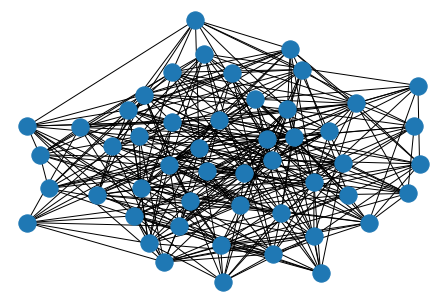

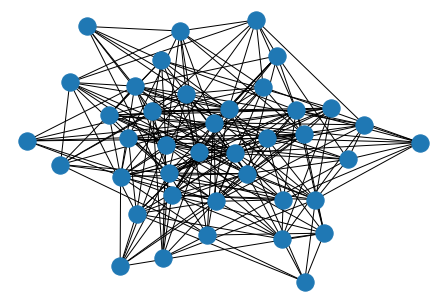

In [ ]:
#Erdos-Renyi Graph in Networkx
import random
import copy
from networkx import nx
import matplotlib.pyplot as plt

N = 50  # 50 Indian Cities
K = 100000  # 10000 Agents(people under observation on SIR modeling)
#M = 30  # 30 Edges
NN = 40 # 50 nodes contact network of Cities


#Graph = nx.gnm_random_graph(N, M)

P = .3 #Probabibilty for Node Connection in random graph
PP = .3
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


# some network properties
#print("the adjacency list")
#for line in nx.generate_adjlist(Graph):
#    print(line)

nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [ ]:
#!jupyter notebook --generate-config

In [ ]:
#%%writefile /root/.jupyter/jupyter_notebook_config.py
#NotebookApp.iopub_data_rate_limit =
#NotebookApp.rate_limit_window =

In [ ]:
#%pycat /root/.jupyter/jupyter_notebook_config.py

In [ ]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 0 1 ... 1 0 1]
 [0 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 0 ... 1 0 1]
 [1 0 0 ... 1 1 0]]
[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 1 0]
 [0 1 0 ... 0 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [ ]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
#print(Node)
print(len(Node))


{}
2000


In [ ]:
#Adding Viral_Index Randomly
for i in range(N):
  for j in range(NN):
    Viral_load=0
    Node[i*NN+j].append({'Viral_load' : Viral_load})
    Node[i*NN+j].append({'S' : 0})
    Node[i*NN+j].append({'I' : 0})
    Node[i*NN+j].append({'R' : 0})
#print(Node)
print(len(Node))


2000


In [ ]:
#Initailizing randomly infection state [0 shows Susceptible, 1 shows Infected, and 2 shows Recovered]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  Rand_node=random.randint(0,N-1)
  Neighbors = list(Graph.neighbors(Rand_node))
  Rand_nodeN=random.randint(0,NN-1)
  First_nodeN = random.randint(0,NN-1)
  Second_nodeN = random.randint(0,NN-1)
  Rand_state=random.choices([0,1],weights=(98,2),k=1)[0]
  Rand_neighbors = list(GraphN.neighbors(Rand_nodeN))
  Rand_neighbors1 = list(GraphN.neighbors(First_nodeN))
  Rand_neighbors2 = list(GraphN.neighbors(Second_nodeN))
  if len(Rand_neighbors) > 0:
    Rand_nodeN1=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN1)
  else:
    Rand_nodeN1=Rand_nodeN
  
  if len(Rand_neighbors) > 0:
    Rand_nodeN2=random.choice(Rand_neighbors)
    Rand_neighbors.remove(Rand_nodeN2)
    if Rand_nodeN2 not in list(GraphN.neighbors(Rand_nodeN1)):
      Rand_nodeN2=Rand_nodeN1
  else:
    Rand_nodeN2=Rand_nodeN1
  
  if Rand_state == 0:
    Node[Rand_node*NN+Rand_nodeN][1]['S']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})
  elif Rand_state == 1:
    Node[Rand_node*NN+Rand_nodeN][2]['I']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state, 'V_l' : 1})
    Agent[k].append({'State' : Rand_state, 'V_l' : 1 })
  else:
    Node[Rand_node*NN+Rand_nodeN][3]['R']+=1
    Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
    Agent[k].append({'State' : Rand_state})

  #Node[Rand_node*NN+Rand_nodeN].append({k : Rand_state})
  #Agent[k].append({'State' : Rand_state})
  Agent[k].append({'Home_node' : Rand_node})
  Agent[k].append({'Home_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
  
  if len(Neighbors) > 0:
    First_node = random.choice(Neighbors)
    Neighbors.remove(First_node)
  else:
    First_node = Rand_node
  if len(Neighbors) > 0:
    Second_node = random.choice(Neighbors)
  else:
    Second_node = Rand_node

  if len(Rand_neighbors1) > 0:
    First_nodeN1=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN1)
  else:
    First_nodeN1=First_nodeN
  
  if len(Rand_neighbors1) > 0:
    First_nodeN2=random.choice(Rand_neighbors1)
    Rand_neighbors1.remove(First_nodeN2)
    if First_nodeN2 not in list(GraphN.neighbors(First_nodeN1)):
      First_nodeN2=First_nodeN1
  else:
    First_nodeN2=First_nodeN1

  if len(Rand_neighbors2) > 0:
    Second_nodeN1=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN1)
  else:
    Second_nodeN1=Second_nodeN
  
  if len(Rand_neighbors2) > 0:
    Second_nodeN2=random.choice(Rand_neighbors2)
    Rand_neighbors2.remove(Second_nodeN2)
    if Second_nodeN2 not in list(GraphN.neighbors(Second_nodeN1)):
      Second_nodeN2=Second_nodeN1
  else:
    Second_nodeN2=Second_nodeN1

  Agent[k].append({'First_node' : First_node})
  Agent[k].append({'First_nodeN' : [First_nodeN, First_nodeN1, First_nodeN2]})
  Agent[k].append({'Second_node' : Second_node})
  Agent[k].append({'Second_nodeN' : [Second_nodeN, Second_nodeN1, Second_nodeN2]})
  Agent[k].append({'Current_node' : Rand_node})
  Agent[k].append({'Current_nodeN' : [Rand_nodeN, Rand_nodeN1, Rand_nodeN2]})
#print(Node)
#print(Agent)

In [ ]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

50
40


In [ ]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, Agent=Agent, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    Agent_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append({'Viral_load' : copy.deepcopy(Node[i*len(GraphN.nodes)+j][0]['Viral_load'])/2})
        Node_next[i*len(GraphN.nodes)+j].append({'S' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'I' : 0})
        Node_next[i*len(GraphN.nodes)+j].append({'R' : 0})
    for i in range(len(Agent)):
      Agent_next[i] = list()
    Agent_next = copy.deepcopy(Agent)
    count_nomove=0
    count_move_first=0
    count_move_second=0
    count_stay_home=0
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(4,len(Node[i*len(GraphN.nodes)+j]))):
          a_id = list(Node[i*len(GraphN.nodes)+j][agent].keys())[0]
          #print(a_id)
          #print(Agent[a_id])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = []
                  #if Agent_next[a_id][1]['Home_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent_next[a_id][1]['Home_node'])
                  #if Agent_next[a_id][3]['First_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']):
                  neighbors.append(Agent[a_id][3]['First_node'])
                  #if Agent_next[a_id][5]['Second_node'] in Graph.neighbors(Agent_next[a_id][7]['Current_node']) :
                  neighbors.append(Agent_next[a_id][5]['Second_node'])

                  if len(neighbors) > 0:
                      if len(neighbors) == 3:
                        PN=1/(Node[cur][2]['I'] +Node[cur][1]['S'] + 1)
                        P = 100-PN 
                        #print(P)
                        #print(PN)
                        next = random.choices(neighbors,weights=(P,PN/2,PN/2), k=1)[0] 
                      elif len(neighbors) == 2:
                        next = random.choices(neighbors,weights=(P,PN), k=1)[0]
                      else:
                        next = random.choices(neighbors,weights=(100), k=1)[0]
                      #next = random.choice(neighbors)
                      if next == Agent_next[a_id][7]['Current_node']:
                        #print("no movement")
                        count_nomove+=1

                      else:
                        if next == Agent_next[a_id][3]['First_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][3]['First_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][4]['First_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][4]['First_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][4]['First_nodeN'][2]
                          count_move_first+=1
                        elif next == Agent_next[a_id][5]['Second_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][5]['Second_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][6]['Second_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][6]['Second_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][6]['Second_nodeN'][2]
                          count_move_second+=1
                        elif next == Agent_next[a_id][1]['Home_node']:
                          Agent_next[a_id][7]['Current_node'] = Agent_next[a_id][1]['Home_node']
                          Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][2]['Home_nodeN'][0]
                          Agent_next[a_id][8]['Current_nodeN'][1] = Agent_next[a_id][2]['Home_nodeN'][1]
                          Agent_next[a_id][8]['Current_nodeN'][2] = Agent_next[a_id][2]['Home_nodeN'][2]
                          count_stay_home+=1
                      PN1=1/((Node[cur][2]['I'] + Node[cur][1]['S'] + 1))
                      P1 = 100-PN1  
                      nextn = random.choices(Agent_next[a_id][8]['Current_nodeN'],weights=(P1,PN1/2,PN1/2),k=1)[0]
                      if nextn == Agent_next[a_id][8]['Current_nodeN'][1]:
                        Agent_next[a_id][8]['Current_nodeN'][1],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][1]
                      elif nextn == Agent_next[a_id][8]['Current_nodeN'][2] :
                        Agent_next[a_id][8]['Current_nodeN'][2],Agent_next[a_id][8]['Current_nodeN'][0] = Agent_next[a_id][8]['Current_nodeN'][0],Agent_next[a_id][8]['Current_nodeN'][2]
                      else:
                        Agent_next[a_id][8]['Current_nodeN'][0]=Agent_next[a_id][8]['Current_nodeN'][0]                      
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(copy.deepcopy(Node[cur][agent]))
          if Node[cur][agent][a_id] == 0:
            Node_next[nex][1]['S']+=1
          elif Node[cur][agent][a_id] == 1:
            Node_next[nex][2]['I']+=1
            Node_next[nex][-1]['V_l']/=2
            #Node_next[nex][0]['Viral_load']+=1
            #if nex != cur:
            #  Node_next[cur][0]['Viral_load']+=1
          elif Node[cur][agent][a_id] == 2:
            Node_next[nex][3]['R']+=1

          curr_walk.append(nex)
          #print(Agent[a_id])
          #print(curr_walk)
          walks.append(nex)
    #print(Node_next)
    #print(Agent_next)

    #State-transition-logic
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        count_SI=0
        count_IR=0
        W1 = Node_next[i*len(GraphN.nodes)+j][2]['I'] + Node_next[i*len(GraphN.nodes)+j][0]['Viral_load']
        W2 = Node_next[i*len(GraphN.nodes)+j][1]['S'] + Node_next[i*len(GraphN.nodes)+j][3]['R'] - 1
        for agent in list(range(4,len(Node_next[i*len(GraphN.nodes)+j]))):
          a_id = list(Node_next[i*len(GraphN.nodes)+j][agent].keys())[0]
          if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 0:
            Node_next[i*len(GraphN.nodes)+j][agent][a_id] = random.choices([1,0], weights=(W1,W2), k=1)[0] 
            if Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
              count_SI+=1
              Node_next[i*len(GraphN.nodes)+j][agent].update({'V_l' : 1})
              Agent_next[a_id][0]['State'] = 1
          elif Node_next[i*len(GraphN.nodes)+j][agent][a_id] == 1:
            if Node_next[i*len(GraphN.nodes)+j][agent]['V_l'] < .01:
              Node_next[i*len(GraphN.nodes)+j][agent][a_id] = 2
              count_IR+=1
              Agent_next[a_id][0]['State'] = 2
              Node_next[i*len(GraphN.nodes)+j][agent].pop('V_l') 
        Node_next[i*len(GraphN.nodes)+j][1]['S']-=count_SI
        Node_next[i*len(GraphN.nodes)+j][2]['I']+=(count_SI - count_IR)
        Node_next[i*len(GraphN.nodes)+j][3]['R']+=count_IR 
         
    #print("count_no_movements",count_nomove)
    #print("count_movements_firstnode",count_move_first)
    #print("count_movements_secondnode",count_move_second)
    #print("count_stay_homenode",count_stay_home)  
    return Node,Node_next,Agent,Agent_next

In [ ]:
def Count_SIR_Node(Node=Node):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Node)):
    count_S+=Node[i][1]['S'] 
    count_I+=Node[i][2]['I']
    count_R+=Node[i][3]['R'] 
  return count_S,count_I,count_R

In [ ]:
def Count_SIR_Agent(Agent=Agent):
  count_S=0
  count_I=0
  count_R=0
  for i in range(len(Agent)):
    if Agent[i][0]['State'] == 0:
      count_S+=1
    elif Agent[i][0]['State'] == 1:
      count_I+=1
    elif Agent[i][0]['State'] == 2:
      count_R+=1
  return count_S,count_I,count_R 

[97963, 95938, 92194, 85636, 75692, 63294, 51671, 43539, 39204, 37101, 36045, 35399, 34912, 34450, 34023, 33635, 33307, 33054, 32867, 32713, 32580, 32492, 32420, 32377, 32360, 32351, 32350, 32350, 32350, 32350, 32350, 32350, 32350, 32350]
[2037, 4062, 7806, 14364, 24308, 36706, 48329, 54424, 56734, 55093, 49591, 40293, 28382, 17221, 9516, 5569, 3794, 2991, 2532, 2199, 1870, 1531, 1215, 930, 694, 516, 363, 230, 142, 70, 27, 10, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 2037, 4062, 7806, 14364, 24308, 36706, 48329, 56461, 60796, 62899, 63955, 64601, 65088, 65550, 65977, 66365, 66693, 66946, 67133, 67287, 67420, 67508, 67580, 67623, 67640, 67649, 67650]
[[], [97963, 95938, 92194, 85636, 75692, 63294, 51671, 43539, 39204, 37101, 36045, 35399, 34912, 34450, 34023, 33635, 33307, 33054, 32867, 32713, 32580, 32492, 32420, 32377, 32360, 32351, 32350, 32350, 32350, 32350, 32350, 32350, 32350, 32350]]
[[], [2037, 4062, 7806, 14364, 24308, 36706, 48329, 54424, 56734, 55093, 49591, 40293, 28382, 17221, 9516, 556

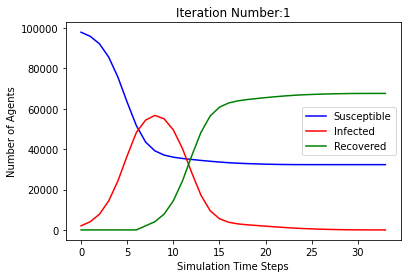

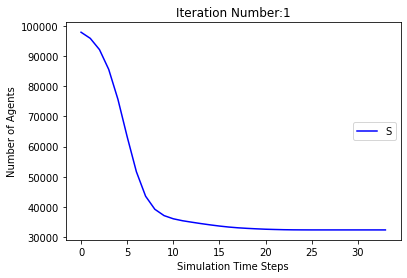

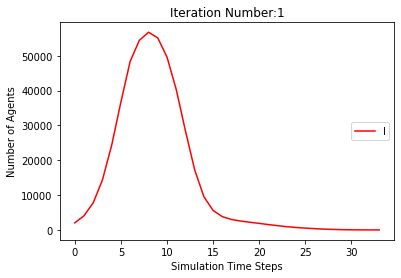

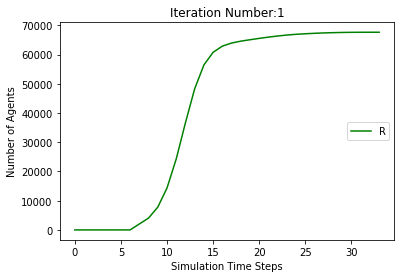

[97963, 95969, 92305, 85868, 76107, 63660, 52016, 43884, 39613, 37558, 36580, 35945, 35532, 35174, 34813, 34420, 33969, 33492, 33086, 32782, 32600, 32491, 32432, 32388, 32338, 32296, 32277, 32265, 32257, 32247, 32238, 32226, 32218, 32214, 32213, 32213, 32213, 32213, 32213, 32213, 32213, 32213]
[2037, 4031, 7695, 14132, 23893, 36340, 47984, 54079, 56356, 54747, 49288, 40162, 28128, 16842, 9071, 5193, 3589, 3088, 2859, 2750, 2574, 2322, 1988, 1581, 1154, 790, 505, 335, 234, 185, 150, 112, 78, 63, 52, 44, 34, 25, 13, 5, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 2037, 4031, 7695, 14132, 23893, 36340, 47984, 56116, 60387, 62442, 63420, 64055, 64468, 64826, 65187, 65580, 66031, 66508, 66914, 67218, 67400, 67509, 67568, 67612, 67662, 67704, 67723, 67735, 67743, 67753, 67762, 67774, 67782, 67786, 67787]
[[], [97963, 95938, 92194, 85636, 75692, 63294, 51671, 43539, 39204, 37101, 36045, 35399, 34912, 34450, 34023, 33635, 33307, 33054, 32867, 32713, 32580, 32492, 32420, 32377, 32360, 32351, 32350, 32350, 32350

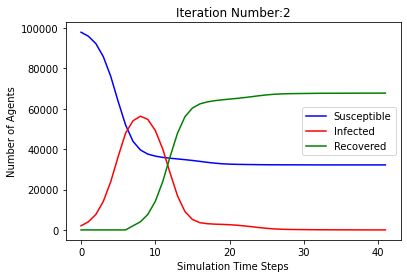

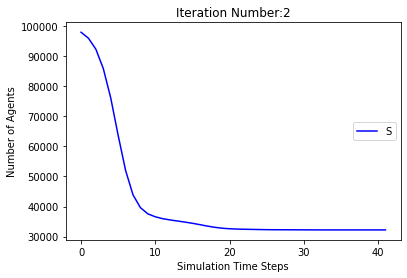

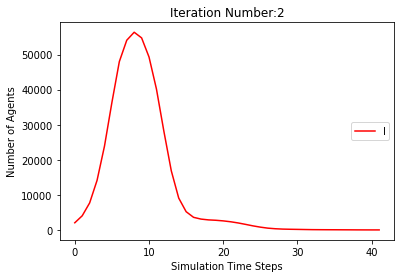

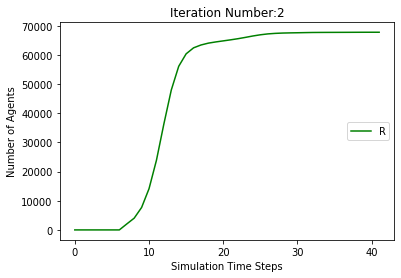

[97963, 96060, 92426, 85993, 76223, 63805, 51996, 43574, 39095, 37012, 36004, 35411, 34893, 34439, 33979, 33561, 33150, 32803, 32475, 32223, 32033, 31901, 31777, 31709, 31661, 31622, 31583, 31554, 31529, 31508, 31486, 31462, 31448, 31431, 31419, 31414, 31414, 31414, 31414, 31414, 31414, 31414, 31414]
[2037, 3940, 7574, 14007, 23777, 36195, 48004, 54389, 56965, 55414, 49989, 40812, 28912, 17557, 9595, 5534, 3862, 3201, 2936, 2670, 2406, 2078, 1784, 1441, 1142, 853, 640, 479, 372, 269, 223, 199, 174, 152, 135, 115, 94, 72, 48, 34, 17, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 2037, 3940, 7574, 14007, 23777, 36195, 48004, 56426, 60905, 62988, 63996, 64589, 65107, 65561, 66021, 66439, 66850, 67197, 67525, 67777, 67967, 68099, 68223, 68291, 68339, 68378, 68417, 68446, 68471, 68492, 68514, 68538, 68552, 68569, 68581, 68586]
[[], [97963, 95938, 92194, 85636, 75692, 63294, 51671, 43539, 39204, 37101, 36045, 35399, 34912, 34450, 34023, 33635, 33307, 33054, 32867, 32713, 32580, 32492, 32420, 32377, 32360, 323

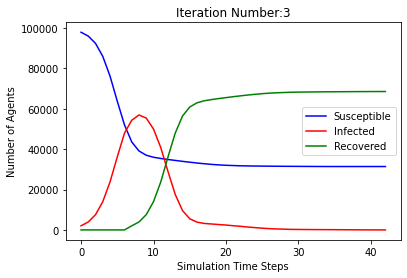

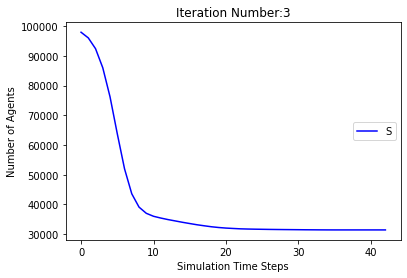

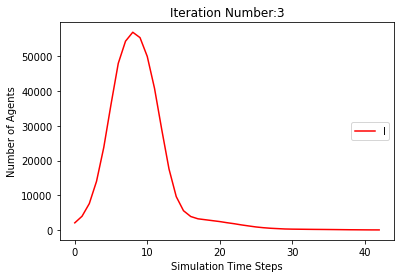

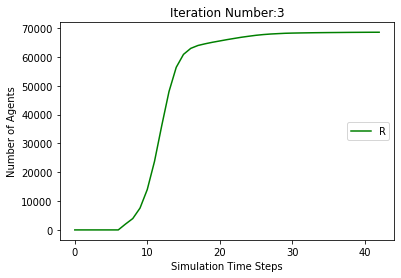

[97963, 95946, 92187, 85703, 75705, 63346, 51605, 43445, 39207, 37291, 36421, 35901, 35426, 34971, 34483, 34003, 33618, 33279, 32972, 32704, 32473, 32306, 32202, 32153, 32128, 32109, 32092, 32072, 32067, 32066, 32066, 32066, 32066, 32066, 32066, 32066, 32066]
[2037, 4054, 7813, 14297, 24295, 36654, 48395, 54518, 56739, 54896, 49282, 39804, 27920, 16634, 8962, 5204, 3673, 3142, 2929, 2722, 2498, 2177, 1801, 1465, 1151, 863, 612, 401, 239, 136, 87, 62, 43, 26, 6, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 2037, 4054, 7813, 14297, 24295, 36654, 48395, 56555, 60793, 62709, 63579, 64099, 64574, 65029, 65517, 65997, 66382, 66721, 67028, 67296, 67527, 67694, 67798, 67847, 67872, 67891, 67908, 67928, 67933, 67934]
[[], [97963, 95938, 92194, 85636, 75692, 63294, 51671, 43539, 39204, 37101, 36045, 35399, 34912, 34450, 34023, 33635, 33307, 33054, 32867, 32713, 32580, 32492, 32420, 32377, 32360, 32351, 32350, 32350, 32350, 32350, 32350, 32350, 32350, 32350], [97963, 95969, 92305, 85868, 76107, 63660, 52016, 4388

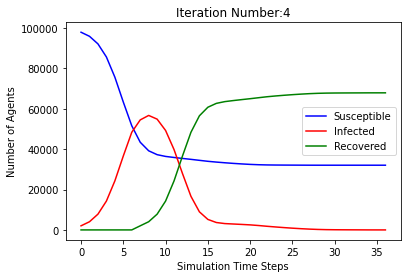

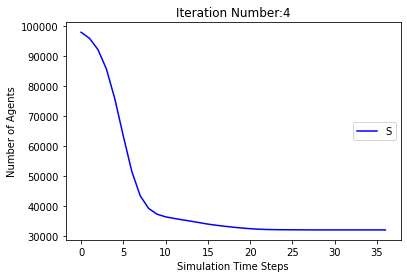

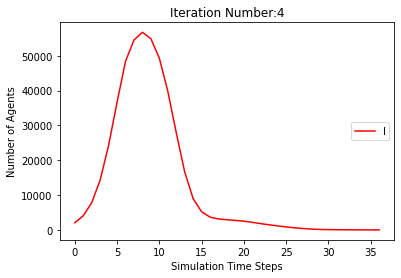

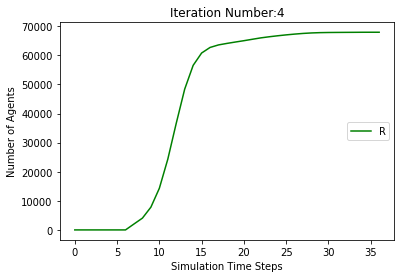

[97963, 96001, 92246, 85595, 75592, 63334, 51976, 43830, 39468, 37338, 36280, 35613, 35133, 34594, 34033, 33493, 32979, 32530, 32198, 31965, 31749, 31582, 31436, 31312, 31227, 31153, 31094, 31063, 31031, 31014, 31009, 31008, 31007, 31000, 30991, 30978, 30957, 30938, 30924, 30907, 30903, 30900, 30899, 30899, 30899, 30899, 30899, 30899, 30899, 30899]
[2037, 3999, 7754, 14405, 24408, 36666, 48024, 54133, 56533, 54908, 49315, 39979, 28201, 17382, 9797, 5975, 4359, 3750, 3415, 3168, 2845, 2451, 2057, 1667, 1303, 1045, 871, 686, 551, 422, 303, 219, 146, 94, 72, 53, 57, 71, 84, 100, 97, 91, 79, 58, 39, 25, 8, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 2037, 3999, 7754, 14405, 24408, 36666, 48024, 56170, 60532, 62662, 63720, 64387, 64867, 65406, 65967, 66507, 67021, 67470, 67802, 68035, 68251, 68418, 68564, 68688, 68773, 68847, 68906, 68937, 68969, 68986, 68991, 68992, 68993, 69000, 69009, 69022, 69043, 69062, 69076, 69093, 69097, 69100, 69101]
[[], [97963, 95938, 92194, 85636, 75692, 63294, 51671, 43539,

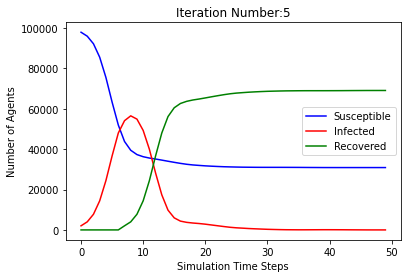

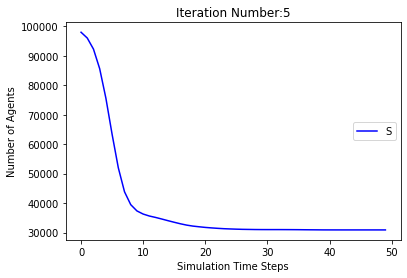

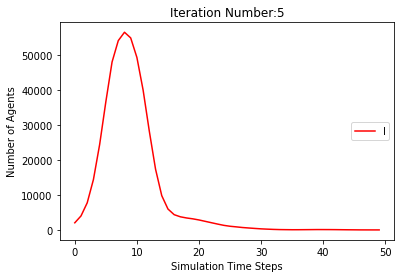

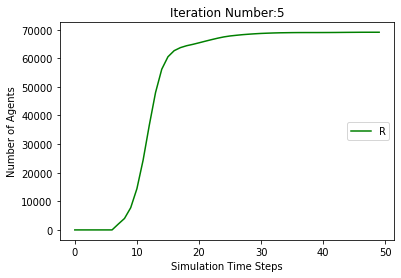

[97963, 95970, 92224, 85689, 75706, 63511, 52005, 43896, 39553, 37331, 36194, 35568, 35029, 34577, 34123, 33717, 33290, 32903, 32505, 32200, 31983, 31836, 31708, 31635, 31571, 31532, 31506, 31486, 31480, 31479, 31478, 31474, 31471, 31462, 31445, 31431, 31416, 31406, 31398, 31394, 31392, 31391, 31385, 31380, 31370, 31356, 31335, 31314, 31297, 31289, 31287, 31286, 31286, 31286, 31286, 31286, 31286, 31286, 31286]
[2037, 4030, 7776, 14311, 24294, 36489, 47995, 54067, 56417, 54893, 49495, 40138, 28482, 17428, 9773, 5836, 4041, 3291, 3063, 2829, 2594, 2287, 2009, 1655, 1332, 973, 694, 497, 356, 229, 157, 97, 61, 44, 41, 49, 63, 72, 76, 77, 70, 54, 46, 36, 36, 42, 59, 78, 94, 96, 93, 84, 70, 49, 28, 11, 3, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 2037, 4030, 7776, 14311, 24294, 36489, 47995, 56104, 60447, 62669, 63806, 64432, 64971, 65423, 65877, 66283, 66710, 67097, 67495, 67800, 68017, 68164, 68292, 68365, 68429, 68468, 68494, 68514, 68520, 68521, 68522, 68526, 68529, 68538, 68555, 68569, 68584, 68594, 

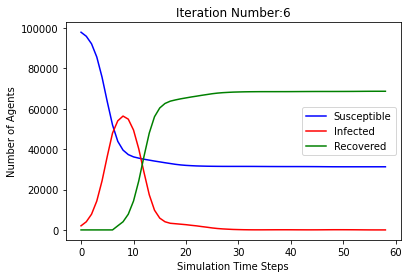

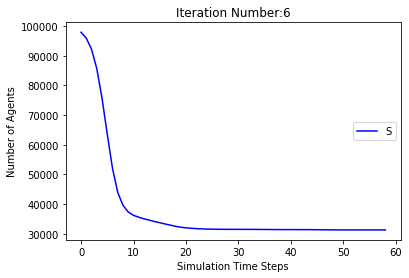

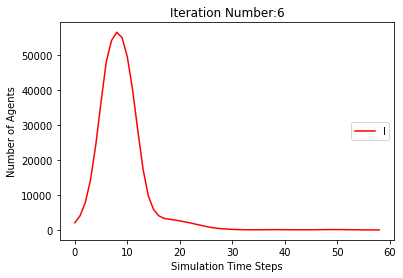

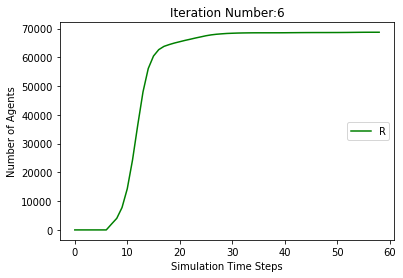

[97963, 96002, 92238, 85647, 75461, 62931, 51123, 43044, 38998, 37102, 36165, 35572, 35043, 34579, 34177, 33797, 33462, 33135, 32849, 32615, 32433, 32281, 32174, 32113, 32060, 32026, 31991, 31963, 31945, 31931, 31916, 31907, 31902, 31900, 31895, 31883, 31874, 31865, 31859, 31858, 31857, 31857, 31857, 31857, 31857, 31857, 31857, 31857]
[2037, 3998, 7762, 14353, 24539, 37069, 48877, 54919, 57004, 55136, 49482, 39889, 27888, 16544, 8867, 5201, 3640, 3030, 2723, 2428, 2146, 1896, 1623, 1349, 1075, 823, 624, 470, 336, 243, 197, 153, 124, 91, 68, 62, 57, 51, 48, 44, 43, 38, 26, 17, 8, 2, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 2037, 3998, 7762, 14353, 24539, 37069, 48877, 56956, 61002, 62898, 63835, 64428, 64957, 65421, 65823, 66203, 66538, 66865, 67151, 67385, 67567, 67719, 67826, 67887, 67940, 67974, 68009, 68037, 68055, 68069, 68084, 68093, 68098, 68100, 68105, 68117, 68126, 68135, 68141, 68142, 68143]
[[], [97963, 95938, 92194, 85636, 75692, 63294, 51671, 43539, 39204, 37101, 36045, 35399, 34912, 34

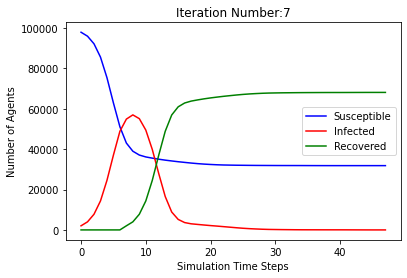

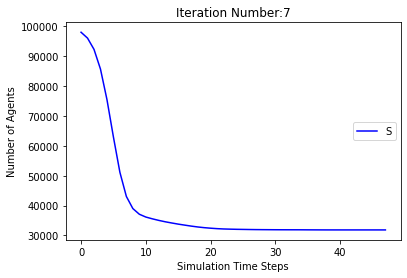

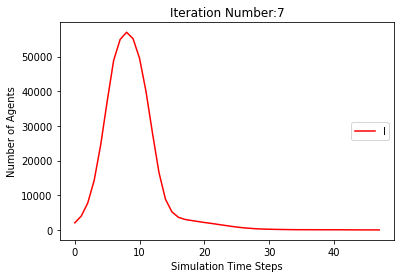

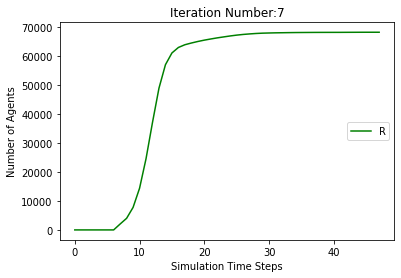

[97963, 95954, 92200, 85624, 75603, 63275, 51759, 43796, 39536, 37379, 36326, 35670, 35154, 34681, 34172, 33609, 33058, 32541, 32100, 31796, 31591, 31439, 31304, 31182, 31120, 31078, 31051, 31032, 31014, 30987, 30968, 30938, 30927, 30924, 30924, 30923, 30923, 30923, 30923, 30923, 30923, 30923, 30923]
[2037, 4046, 7800, 14376, 24397, 36725, 48241, 54167, 56418, 54821, 49298, 39933, 28121, 17078, 9624, 5927, 4321, 3785, 3570, 3358, 3090, 2733, 2305, 1876, 1421, 1022, 745, 559, 425, 317, 214, 182, 151, 127, 108, 91, 64, 45, 15, 4, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 2037, 4046, 7800, 14376, 24397, 36725, 48241, 56204, 60464, 62621, 63674, 64330, 64846, 65319, 65828, 66391, 66942, 67459, 67900, 68204, 68409, 68561, 68696, 68818, 68880, 68922, 68949, 68968, 68986, 69013, 69032, 69062, 69073, 69076, 69076, 69077]
[[], [97963, 95938, 92194, 85636, 75692, 63294, 51671, 43539, 39204, 37101, 36045, 35399, 34912, 34450, 34023, 33635, 33307, 33054, 32867, 32713, 32580, 32492, 32420, 32377, 32360, 32351

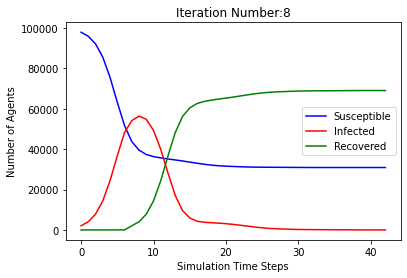

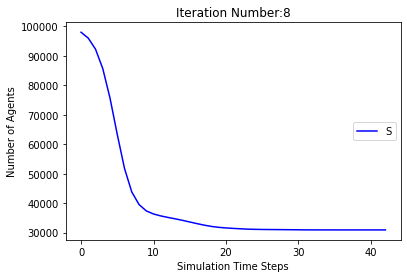

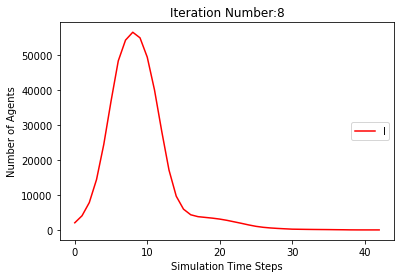

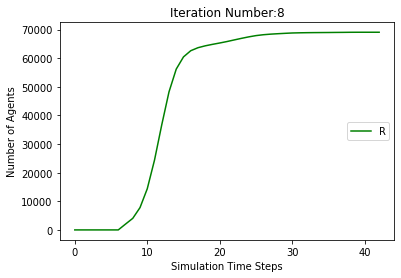

[97963, 95952, 92163, 85506, 75491, 63307, 52067, 44110, 39681, 37500, 36442, 35880, 35530, 35212, 34837, 34476, 34138, 33854, 33599, 33348, 33155, 33022, 32916, 32862, 32827, 32796, 32767, 32756, 32753, 32750, 32746, 32740, 32730, 32721, 32712, 32705, 32702, 32701, 32701, 32701, 32701, 32701, 32701, 32701, 32701]
[2037, 4048, 7837, 14494, 24509, 36693, 47933, 53853, 56271, 54663, 49064, 39611, 27777, 16855, 9273, 5205, 3362, 2588, 2281, 2182, 2057, 1815, 1560, 1276, 1027, 803, 581, 399, 269, 166, 116, 87, 66, 46, 44, 48, 48, 45, 39, 29, 20, 11, 4, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 2037, 4048, 7837, 14494, 24509, 36693, 47933, 55890, 60319, 62500, 63558, 64120, 64470, 64788, 65163, 65524, 65862, 66146, 66401, 66652, 66845, 66978, 67084, 67138, 67173, 67204, 67233, 67244, 67247, 67250, 67254, 67260, 67270, 67279, 67288, 67295, 67298, 67299]
[[], [97963, 95938, 92194, 85636, 75692, 63294, 51671, 43539, 39204, 37101, 36045, 35399, 34912, 34450, 34023, 33635, 33307, 33054, 32867, 32713, 32580, 3

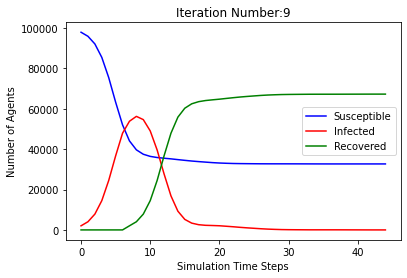

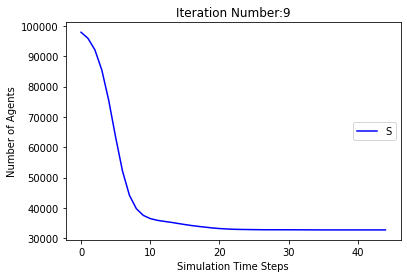

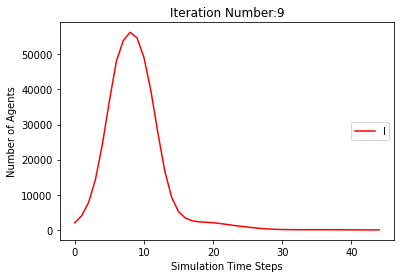

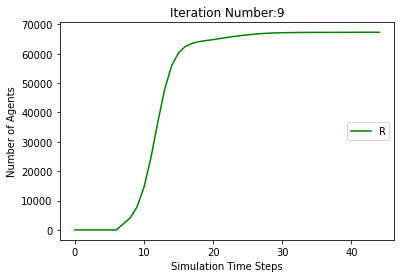

[97963, 95912, 91996, 85235, 75143, 62815, 51371, 43547, 39444, 37443, 36543, 36031, 35559, 35088, 34611, 34123, 33684, 33293, 32984, 32770, 32583, 32451, 32350, 32293, 32248, 32213, 32203, 32193, 32192, 32192, 32192, 32192, 32192, 32192, 32192, 32192]
[2037, 4088, 8004, 14765, 24857, 37185, 48629, 54416, 56468, 54553, 48692, 39112, 27256, 16283, 8936, 5321, 3759, 3250, 3047, 2789, 2505, 2160, 1773, 1391, 1045, 771, 567, 390, 259, 158, 101, 56, 21, 11, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 2037, 4088, 8004, 14765, 24857, 37185, 48629, 56453, 60556, 62557, 63457, 63969, 64441, 64912, 65389, 65877, 66316, 66707, 67016, 67230, 67417, 67549, 67650, 67707, 67752, 67787, 67797, 67807, 67808]
[[], [97963, 95938, 92194, 85636, 75692, 63294, 51671, 43539, 39204, 37101, 36045, 35399, 34912, 34450, 34023, 33635, 33307, 33054, 32867, 32713, 32580, 32492, 32420, 32377, 32360, 32351, 32350, 32350, 32350, 32350, 32350, 32350, 32350, 32350], [97963, 95969, 92305, 85868, 76107, 63660, 52016, 43884, 39613, 37558,

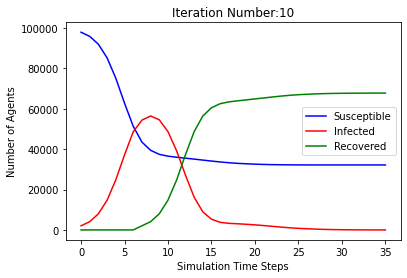

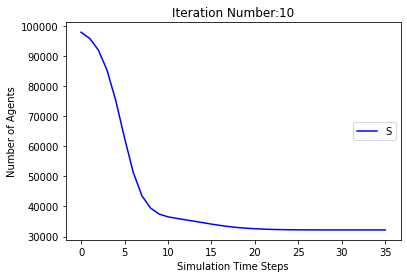

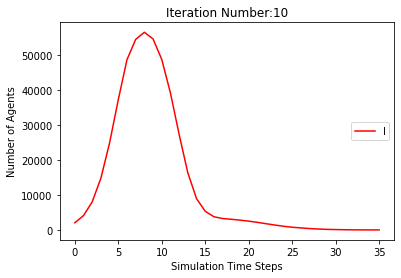

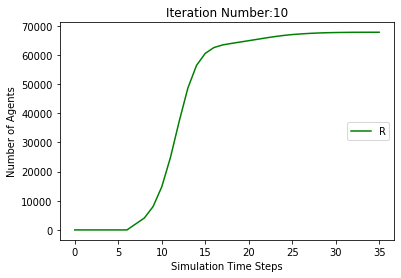

In [ ]:
#from numpy import zeros, linspace
#Node_p=Node.copy()
#Node_n=Node.copy() 
#Agent_p=Agent.copy()
#Agent_n=Agent.copy()
#print(Node_p)
#print(Agent_p)
#S,I,R = Count_SIR_Node(Node_n) 
#S1,I1,R1 = Count_SIR_Agent(Agent_n)
#print([S,I,R]) 
#print([S1,I1,R1])
SS,II,RR,TT = [[]],[[]],[[]],[[]]
for i in range(10):
  j=0
  Node_p=Node.copy()
  Node_n=Node.copy() 
  Agent_p=Agent.copy()
  Agent_n=Agent.copy()
  Sj,Ij,Rj = Count_SIR_Node(Node_n) 
  #print([Sj,Ij,Rj]) 
  S,I,R,T = [],[],[],[]
  S.append(Sj)
  I.append(Ij)
  R.append(Rj)
  T.append(j)

  while Ij > 0 :
    Node_p,Node_n,Agent_p,Agent_n = random_walk(Graph,GraphN,Node_n,Agent_n,1,1)
    j+=1 
    #count=0
    #for i in range(len(Node_p)):
    #  count+=len(Node_p[i]) - 4
    #print(count)
    Sj,Ij,Rj = Count_SIR_Node(Node_n) 
    S.append(Sj)
    I.append(Ij)
    R.append(Rj)
    T.append(j)
    #S1,I1,R1 = Count_SIR_Agent(Agent_n)
    #print("Simulation No:",i+1, "Iteration No: ", j)
    #print(Node_n)
    #print(Agent_n)
    #print([Sj,Ij,Rj]) 
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    #print([S1,I1,R1])
  print(S)
  print(I)
  print(R)
  SS.append(S)
  II.append(I)
  RR.append(R)
  TT.append(T)
  print(SS)
  print(II)
  print(RR)
  plt.plot(T, S, 'b', T, I, 'r', T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
  plt.show()  
  
  plt.plot(T, S, 'b')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Susceptible"),loc='center right')
  plt.show()

  plt.plot(T, I, 'r')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Infected"),loc='center right')
  plt.show()

  plt.plot(T, R, 'g')
  plt.xlabel('Simulation Time Steps')
  plt.title('Iteration Number:'+str(i+1))
  plt.ylabel('Number of Agents')
  plt.legend(("Recovered"),loc='center right')
  plt.show()  

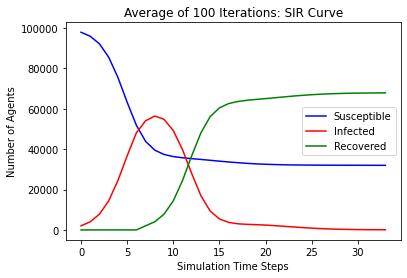

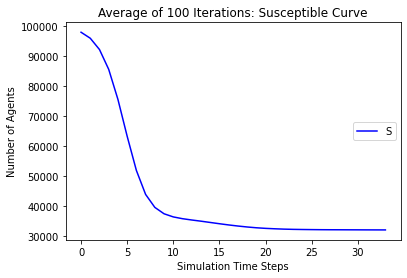

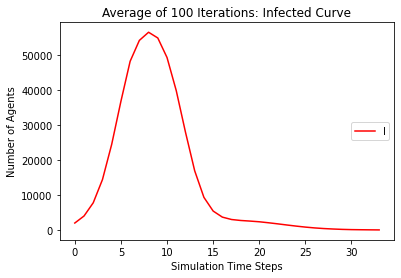

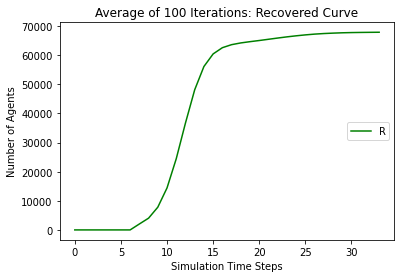

In [ ]:
from statistics import mean
SC = SS[1]
IC = II[1]
RC = RR[1]
TC = TT[1]
for i in range(2,10):
  SC = [mean(i) for i in zip(SC,SS[i])] 
  IC = [mean(i) for i in zip(IC,II[i])] 
  RC = [mean(i) for i in zip(RC,RR[i])] 
  TC = [mean(i) for i in zip(TC,TT[i])] 

plt.plot(TC, SC, 'b', TC, IC, 'r', TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: SIR Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible", "Infected", "Recovered"),loc='center right')
plt.show()  
  
plt.plot(TC, SC, 'b')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Susceptible Curve')
plt.ylabel('Number of Agents')
plt.legend(("Susceptible"),loc='center right')
plt.show()

plt.plot(TC, IC, 'r')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Infected Curve')
plt.ylabel('Number of Agents')
plt.legend(("Infected"),loc='center right')
plt.show()

plt.plot(TC, RC, 'g')
plt.xlabel('Simulation Time Steps')
plt.title('Average of 100 Iterations: Recovered Curve')
plt.ylabel('Number of Agents')
plt.legend(("Recovered"),loc='center right')
plt.show()  


  
